In [13]:
import numpy as np
import scipy as sp
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline


(61877, 6)


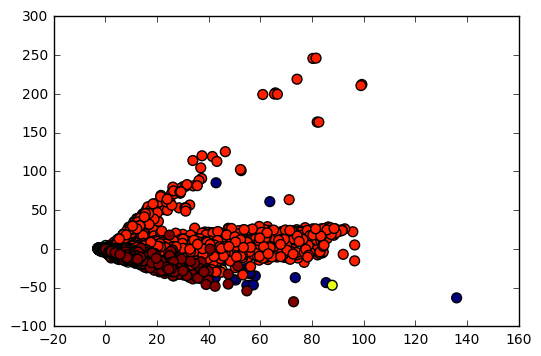

In [33]:
df = pd.read_csv('/home/amal/Otto-Group-Product-Classification-Challenge/data/reduced data/reducted training  data set.csv')
train_data = df.as_matrix()
#print(train_data)
print(train_data.shape)
y=train_data[:,5]
X=train_data[:,0:5]
plt.scatter(X[:,0],X[:,3] , c = y, s =50)

# when we plot the the data we can remark that data is intersected ( we can change the feautures for example X[:,0],X[:,50] 
# or X[:,0],X[:,1] ... for  vizualise data we can permute the features each time) 
# it's hard to visulaisz data on dimensions 93

In [34]:
# the data is no clear if it linear or not so the idea is to try with 2 case and decide though the accaurcy of
#each case (linear or not)

# first step is split my train data into 2 ( train and the test ) ",

import random
np.random.shuffle(train_data)

#training data
train= train_data[:58784]
train_y=train[:,5]
train_X=train[:,0:5]

#validation data
test = train_data[58784:61878]
test_y=test[:,5]
test_X=test[:,0:5]


In [35]:
#linear case
#  variate c in order to choose the best parameters for classification
#  validate step 1
for C in [10**x for x in range(-6,6)]:
    svc = OneVsRestClassifier(svm.LinearSVC(C=C , random_state=0))
    svc.fit(train_X, train_y)
    print("score d'entrainement: for" , C , svc.score(train_X, train_y))
    
#linear case for c= 0.1 because it is the best result 


("score d'entrainement: for", 1e-06, 0.53313826891671201)
("score d'entrainement: for", 1e-05, 0.54897591181273819)
("score d'entrainement: for", 0.0001, 0.56537493195427324)
("score d'entrainement: for", 0.001, 0.56569814915623295)
("score d'entrainement: for", 0.01, 0.56595332063146431)
("score d'entrainement: for", 0.1, 0.56656573217201955)
("score d'entrainement: for", 1, 0.56745032661948824)
("score d'entrainement: for", 10, 0.53711894393032122)
("score d'entrainement: for", 100, 0.45117719107240067)
("score d'entrainement: for", 1000, 0.43154599891126838)
("score d'entrainement: for", 10000, 0.50437193794229718)
("score d'entrainement: for", 100000, 0.28701687534022863)


In [36]:
# validation step 2
svc = OneVsRestClassifier(svm.LinearSVC(C=1, random_state=0))
svc.fit(train_X, train_y)

OneVsRestClassifier(estimator=LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [37]:
print 'predict result is: '
pred = svc.predict(test_X)
print(pred.shape)
print(pred)
print (' accuracy is ' , accuracy_score(test_y, pred))

predict result is: 
(3093,)
[ 6.  2.  6. ...,  2.  6.  8.]
(' accuracy is ', 0.58195926285160038)


In [50]:
df1 = pd.read_csv('/home/amal/Otto-Group-Product-Classification-Challenge/data/reduced data/reducted-data-set.csv')
test_data = df1.as_matrix()
#print (test_data.shape)
#print (test_data.shape)
print 'predict result is: '
prediction = svc.predict(test_data)
print(prediction)

prediction = prediction.astype(int)
print (prediction.shape)



predict result is: 
[ 6.  6.  2. ...,  2.  2.  2.]
(144367,)


In [53]:
tmp_array = [0,0,0,0,0,0,0,0,0,0]
output_matrix = []
for i in range(0,prediction.shape[0]):
    tmp_array[prediction[i]]=1
    tmp_array[0]=i+1
    output_matrix.append(tmp_array[0:10])
    tmp_array[prediction[i]] = 0
#print(np.array(output_matrix).shape)

np.savetxt("/home/amal/mwi4.csv", np.array(output_matrix), fmt='%i', delimiter=",")